<a href="https://colab.research.google.com/github/anishantony8/AWS/blob/main/Text_Summariation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 18.2 MB/s eta 0:00:00


In [5]:
from datasets import load_dataset
dataset = load_dataset("cnn_dailymail", '3.0.0',split="train")

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de. Subsequent calls will reuse this data.


In [6]:
import pandas as pd
df = pd.DataFrame(dataset)

In [7]:
df.head()

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a


In [8]:
df = df[0:1000]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article     1000 non-null   object
 1   highlights  1000 non-null   object
 2   id          1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [10]:
df['article_length'] = df['article'].apply(lambda x: len(x.split()))
df['summary_length'] = df['highlights'].apply(lambda x: len(x.split()))

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

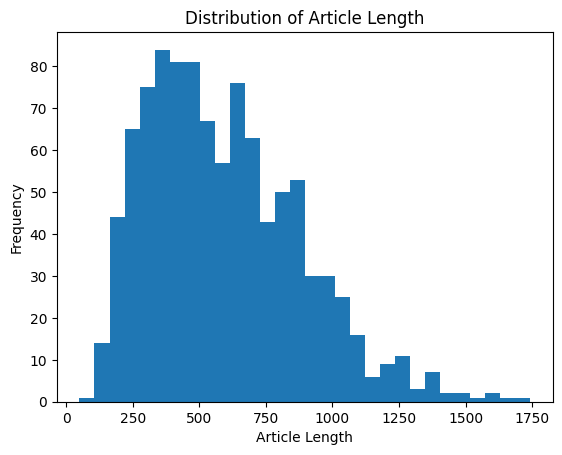

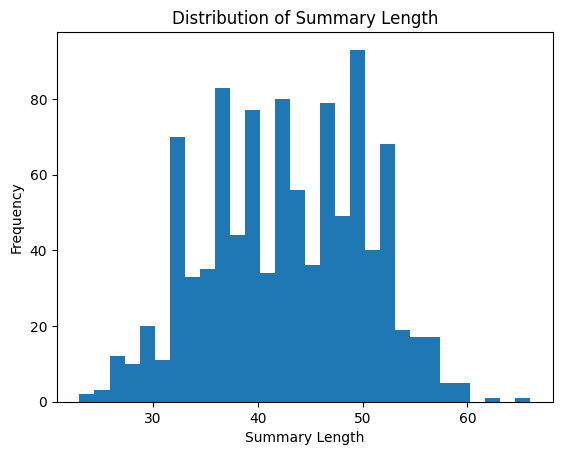

In [13]:
plt.hist(df['article_length'], bins=30)
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.title('Distribution of Article Length')
plt.show()
plt.hist(df['summary_length'], bins=30)
plt.xlabel('Summary Length')
plt.ylabel('Frequency')
plt.title('Distribution of Summary Length')
plt.show()

In [14]:
df[['article_length', 'summary_length']].describe()

,article_length,summary_length
count,1000.000000,1000.000000
mean,591.624000,42.767000
std,286.663598,7.551936
min,50.000000,23.000000
25%,363.000000,37.000000
50%,547.000000,43.000000
75%,780.500000,49.000000
max,1743.000000,66.000000


In [15]:
df['article_word_count'] = df['article'].apply(lambda x: len(x.split()))
df['summary_word_count'] = df['highlights'].apply(lambda x: len(x.split()))
df['article_unique_words'] = df['article'].apply(lambda x: len(set(x.split())))
df['summary_unique_words'] = df['highlights'].apply(lambda x: len(set(x.split())))
df['article_avg_word_length'] = df['article'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
df['summary_avg_word_length'] = df['highlights'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

In [16]:
df[['article_word_count', 'summary_word_count', 'article_unique_words', 'summary_unique_words', 'article_avg_word_length', 'summary_avg_word_length']].describe()

,article_word_count,summary_word_count,article_unique_words,summary_unique_words,article_avg_word_length,summary_avg_word_length
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,591.624000,42.767000,329.775000,36.298000,4.997676,4.941555
std,286.663598,7.551936,135.567662,6.118385,0.268838,0.427113
min,50.000000,23.000000,34.000000,19.000000,4.140000,3.491228
25%,363.000000,37.000000,221.750000,31.000000,4.834993,4.646008
50%,547.000000,43.000000,316.000000,36.000000,5.002720,4.919184
75%,780.500000,49.000000,420.000000,41.000000,5.174078,5.227273
max,1743.000000,66.000000,815.000000,54.000000,5.967890,6.578947


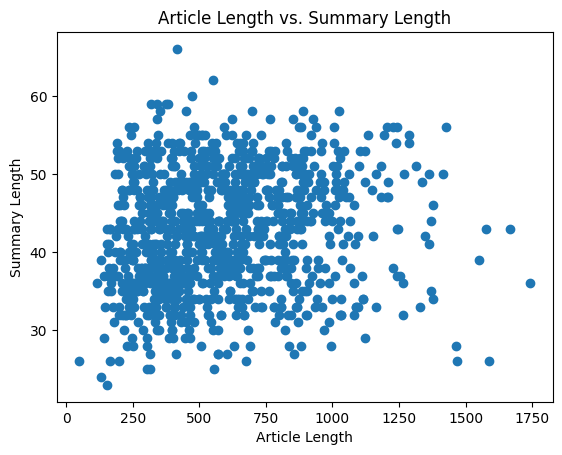

,article_length,summary_length
article_length,1.000000,0.126757
summary_length,0.126757,1.000000


In [17]:
plt.scatter(df['article_length'], df['summary_length'])
plt.xlabel('Article Length')
plt.ylabel('Summary Length')
plt.title('Article Length vs. Summary Length')
plt.show()
df[['article_length', 'summary_length']].corr()

In [18]:
df.dropna(inplace=True)  # Remove rows with missing values
df.reset_index(drop=True, inplace=True)

In [19]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [20]:
nltk.download('punkt')  # Download the necessary resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
stop_words = set(stopwords.words('english'))

In [41]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [42]:
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''

    # Convert words to lower case
    text = text.lower()

    # Replace contractions with their longer forms
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)

    # Format words and remove unwanted characters
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)

    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

In [48]:
import nltk
nltk.download('stopwords')

# Clean the summaries and texts
clean_articles = []
for summary in df['article']:
    clean_articles.append(clean_text(summary, remove_stopwords=False))
print("Summaries are complete.")

clean_highlights = []
for text in df.highlights:
    clean_highlights.append(clean_text(text))
print("Texts are complete.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Summaries are complete.
Texts are complete.


In [49]:
df['clean_articles'] = clean_articles
df['clean_highlights'] = clean_highlights

In [50]:
df['clean_highlights'][0]

'harry potter star daniel radcliffe gets £20m fortune turns 18 monday young actor says plans fritter cash away radcliffe earnings first five potter films held trust fund'

In [51]:
df['clean_articles'][0]

'london  england  reuters     harry potter star daniel radcliffe gains access to a reported £20 million   41 1 million  fortune as he turns 18 on monday  but he insists the money will not cast a spell on him  daniel radcliffe as harry potter in  harry potter and the order of the phoenix  to the disappointment of gossip columnists around the world  the young actor says he has no plans to fritter his cash away on fast cars  drink and celebrity parties   i do not plan to be one of those people who  as soon as they turn 18  suddenly buy themselves a massive sports car collection or something similar   he told an australian interviewer earlier this month   i do not think i will be particularly extravagant   the things i like buying are things that cost about 10 pounds    books and cds and dvds   at 18  radcliffe will be able to gamble in a casino  buy a drink in a pub or see the horror film  hostel  part ii   currently six places below his number one movie on the uk box office chart  detail

In [52]:
df['article_tokens'] = df['clean_articles'].apply(lambda x: word_tokenize(x.lower()))
df['summary_tokens'] = df['clean_highlights'].apply(lambda x: word_tokenize(x.lower()))

In [54]:
df['summary_tokens'][0]

['harry',
 'potter',
 'star',
 'daniel',
 'radcliffe',
 'gets',
 '£20m',
 'fortune',
 'turns',
 '18',
 'monday',
 'young',
 'actor',
 'says',
 'plans',
 'fritter',
 'cash',
 'away',
 'radcliffe',
 'earnings',
 'first',
 'five',
 'potter',
 'films',
 'held',
 'trust',
 'fund']

In [55]:
df['article_tokens'] = df['article_tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df['summary_tokens'] = df['summary_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [56]:
df['summary_tokens'][0]

['harry',
 'potter',
 'star',
 'daniel',
 'radcliffe',
 'gets',
 '£20m',
 'fortune',
 'turns',
 '18',
 'monday',
 'young',
 'actor',
 'says',
 'plans',
 'fritter',
 'cash',
 'away',
 'radcliffe',
 'earnings',
 'first',
 'five',
 'potter',
 'films',
 'held',
 'trust',
 'fund']

In [57]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [58]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))

rocks : rock
corpora : corpus
better : good


In [59]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['article_tokens'] = df['article_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['summary_tokens'] = df['summary_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [60]:
df['summary_tokens'][0]

['harry',
 'potter',
 'star',
 'daniel',
 'radcliffe',
 'get',
 '£20m',
 'fortune',
 'turn',
 '18',
 'monday',
 'young',
 'actor',
 'say',
 'plan',
 'fritter',
 'cash',
 'away',
 'radcliffe',
 'earnings',
 'first',
 'five',
 'potter',
 'film',
 'held',
 'trust',
 'fund']

In [61]:
df['article_text'] = df['article_tokens'].apply(lambda x: ' '.join(x))
df['summary_text'] = df['summary_tokens'].apply(lambda x: ' '.join(x))

In [62]:
df['article_text'][0]

'london england reuters harry potter star daniel radcliffe gain access reported £20 million 41 1 million fortune turn 18 monday insists money cast spell daniel radcliffe harry potter harry potter order phoenix disappointment gossip columnist around world young actor say plan fritter cash away fast car drink celebrity party plan one people soon turn 18 suddenly buy massive sport car collection something similar told australian interviewer earlier month think particularly extravagant thing like buying thing cost 10 pound book cd dvd 18 radcliffe able gamble casino buy drink pub see horror film hostel part ii currently six place number one movie uk box office chart detail mark landmark birthday wrap agent publicist comment plan definitely sort party said interview hopefully none reading radcliffe earnings first five potter film held trust fund able touch despite growing fame rich actor say keeping foot firmly ground people always looking say kid star go rail told reporter last month try h

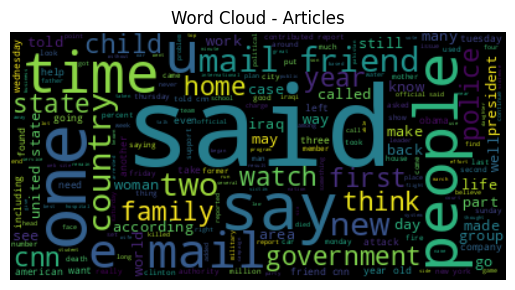

In [65]:
wordcloud = WordCloud().generate(' '.join(df['article_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Articles')
plt.show()

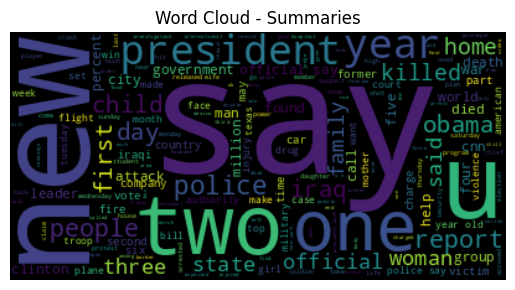

In [66]:
wordcloud = WordCloud().generate(' '.join(df['summary_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Summaries')
plt.show()

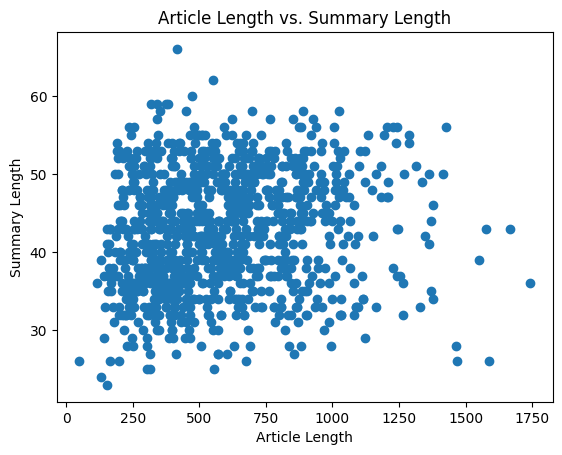

,article_length,summary_length
article_length,1.000000,0.126757
summary_length,0.126757,1.000000


In [67]:
plt.scatter(df['article_length'], df['summary_length'])
plt.xlabel('Article Length')
plt.ylabel('Summary Length')
plt.title('Article Length vs. Summary Length')
plt.show()
df[['article_length', 'summary_length']].corr()

In [68]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)